In [280]:
import sympy as sp
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from sympy.utilities.lambdify import lambdify, implemented_function

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [209]:
# We tekenen het veld

In [227]:
alpha = 1 # projectiehoek t.o.v de r-as
g = 9.8      # zwaartekrachtversnelling aarde. Nodig want GM = R**2 * g
R = 6380000 # straal planeet
c = 3*10**8
G = 6.6743015*10**(-11)
M = 5.97237*10**(24)
gamma = G*M
hoogte = R/2 # beginhoogte t.o.v de planeet
mu = 0.00001*0 # friction?

v = 7000 # beginsnelheid

u = 3000 # exhaust speed rocket

L = (R+hoogte)*v*np.sin(alpha)

m = 2300000

In [269]:
r = sp.symbols('r')
h = sp.symbols('h') # h van hoek

Fr = sp.Function('Fr')

tau = 100000

Fr = -G*m*M/r**2

Fh = sp.Function('Fh')

Fh = 0

In [270]:
# enkel gebruiken voor een racket 

t = sp.symbols('t')

dm = sp.Function('dm')

k =   0.01*0

dm = m-k*t

dmdt = sp.diff(dm, t)

In [271]:
vector = [r,h,t]

Fr_n = lambdify(vector, Fr, 'numpy')
Fh_n = lambdify(vector, Fh, 'numpy')

dm_n = lambdify(t, dm, 'numpy')
dmdt_n = lambdify(t, dmdt, 'numpy')


<IPython.core.display.Javascript object>


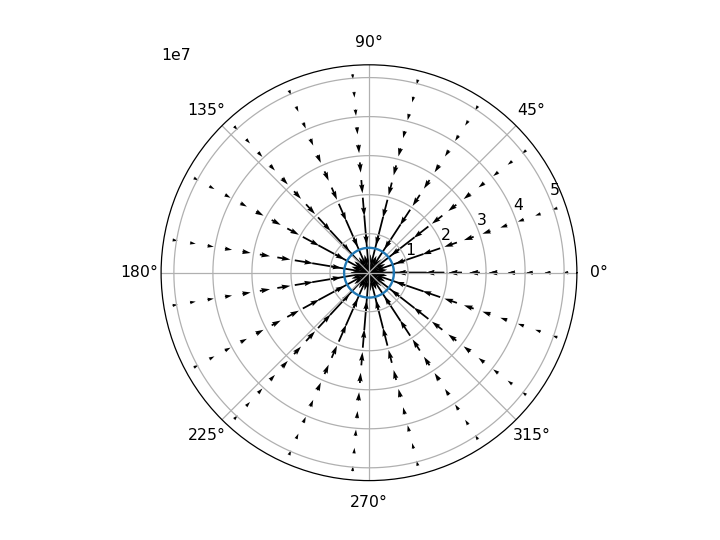

In [272]:
alpha0 = 0
alpha1 = 2*np.pi

radii = np.linspace(R/5*8,8*R,10)  # afstand in de r richting
thetas = np.linspace(alpha0-alpha1,alpha0+alpha1,20)  # afstand in de thetha richting
theta, radius = np.meshgrid(thetas, radii)



dr = Fr_n(radius, theta,290000) # veld in de r richting
dt = Fh_n(radius, theta,0)   # veld in de theta richting


f = plt.figure()
ax = f.add_subplot(111, polar=True)

theta_planeet = np.linspace(0, 2*np.pi, 1000)
straal_planeet = np.linspace(R, R, 1000)

ax.plot(theta_planeet, straal_planeet)

ax.quiver(
    theta, radius,
    dr * np.cos(theta) - dt * np.sin(theta),
    dr * np.sin(theta) + dt * np.cos(theta),
)

plt.show()

In [273]:
# vergelijking opstellen

In [274]:
def dP_dt(P,t):
    v_star = (P[1]**2+P[0]**2*P[3]**2)**(1/2)
    drdt = P[1]
    dvdt = Fr_n(P[0], P[2],t)/dm_n(t) + P[0]*P[3]**2-P[1]*(mu+dmdt_n(t)*u/dm_n(t))
    dhdt = P[3]
    dwdt = 1/(P[0]) * (Fh_n(P[0], P[2],t)/dm_n(t) -2*P[1]*P[3])-P[3]*P[0]*(mu+dmdt_n(t)*u/dm_n(t))/P[0]
    dPdt = [drdt,dvdt, dhdt, dwdt]
    return dPdt

In [276]:
ts =  np.linspace(0, 70000, 5000000)

r0 = (R+hoogte)
vr0 = v*np.cos(alpha)

h0 = 0
vh0 = v/r0

P0 = [r0,vr0, h0, vh0]

def stop_condition(r, P):
    return P[0]

stop_condition.terminal = True

# solve ODE
r_span = (0, 20*R)
#Ps = solve_ivp(dP_dt, r_span, P0,events=stop_condition)




Ps = odeint(dP_dt, P0, ts)
rr = Ps[:,0] # x(t)
vr = Ps[:,1] # vr = d r/dt

hh = Ps[:,2]
vh = Ps[:,3]

In [277]:
hh

array([0.00000000e+00, 1.02402791e-05, 2.04804434e-05, ...,
       6.90764194e+01, 6.90764295e+01, 6.90764396e+01])

In [1]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_xlim([0, 4*np.pi])
ax.set_ylim([0, 20*R])

# Vul hieronder de code aan.
X = hh
Y = rr
ax.plot(X,Y)

theta_planeet = np.linspace(0, 2*np.pi, 1000)
straal_planeet = np.linspace(R, R, 1000)

ax.plot(theta_planeet, straal_planeet)

'''
ax.quiver(
    theta, radius,
    dr * np.cos(theta) - dt * np.sin(theta),
    dr * np.sin(theta) + dt * np.cos(theta),
)
'''

plt.show()


NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


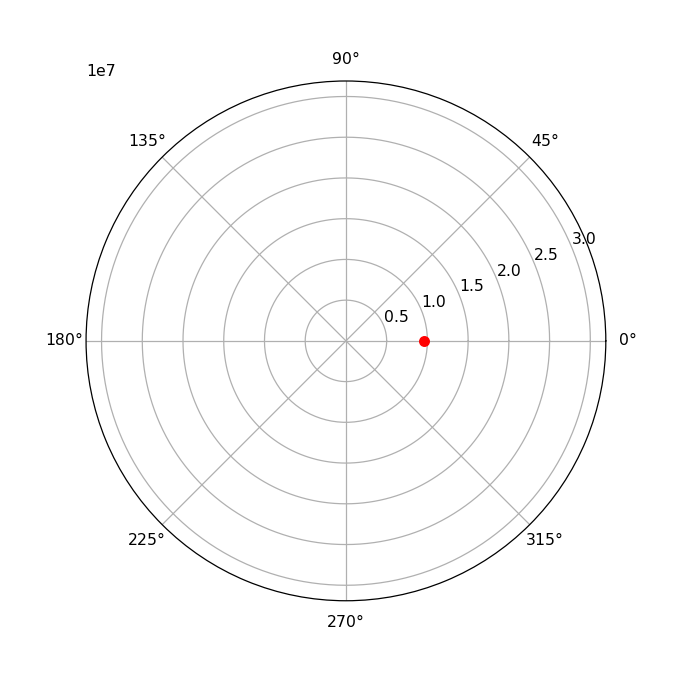

In [164]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5*R])

# Vul hieronder de code aan.
X = hh
Y = rr
functie, = ax.plot([], [])
dot, = ax.plot([], [], 'o', color='red')

def animate(i):
    functie.set_data(X[:i], Y[:i])
    dot.set_data(X[i],Y[i])


anim = animation.FuncAnimation(fig, animate, frames=60, interval=50)
plt.show()